In [ ]:

!pip install -q scikit-learn matplotlib seaborn tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

file_path = r'D:\amrita\sem7\nndl\iris\Iris.csv'  

df = pd.read_csv(file_path)
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])  # 0, 1, 2 for 3 species
class_names = [str(c) for c in label_encoder.classes_]

X = df.drop('Species', axis=1).values  
y = to_categorical(df['Species'].values)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))  
model.add(Dense(3, activation='softmax'))  

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    verbose=1  
)


Epoch 1/100
4/4 [==============================] - 0s 47ms/step - loss: 1.5932 - accuracy: 0.6583 - val_loss: 1.4067 - val_accuracy: 0.7000
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 1.5195 - accuracy: 0.6583 - val_loss: 1.3445 - val_accuracy: 0.7000
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 1.4452 - accuracy: 0.6583 - val_loss: 1.2845 - val_accuracy: 0.7000
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 1.3877 - accuracy: 0.6583 - val_loss: 1.2249 - val_accuracy: 0.7000
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 1.3149 - accuracy: 0.6583 - val_loss: 1.1694 - val_accuracy: 0.7000
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 1.2601 - accuracy: 0.6583 - val_loss: 1.1143 - val_accuracy: 0.7000
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 1.1957 - accuracy: 0.6583 - val_loss: 1.0624 - val_accuracy: 0.7000
Epoch 8/100
4/4 [======

In [ ]:

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9167
Testing Accuracy: 0.9000


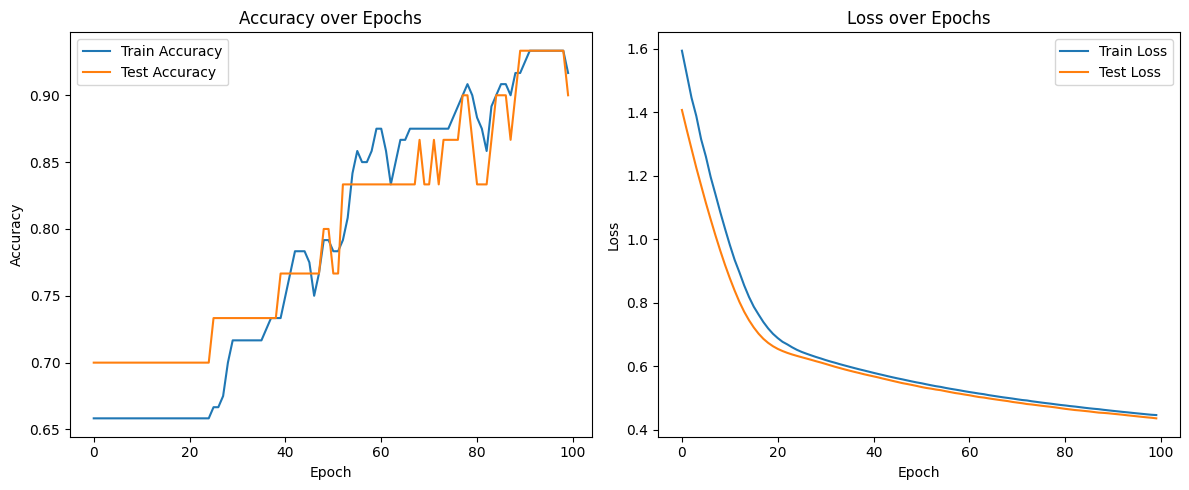

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 61ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.67      0.80         9
           2       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



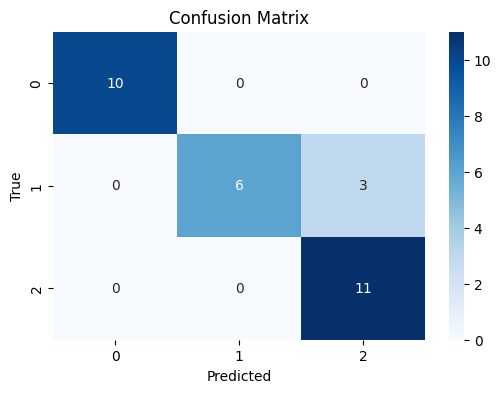

In [ ]:

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [13]:
print(f"Accuracy: {test_accuracy * 100:.2f}%")

Accuracy: 90.00%
